In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

# Train data

In [19]:
df = pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv", index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [21]:
# correlation

df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)*100

satisfaction                         100.000000
Online boarding                       50.498562
Inflight entertainment                40.089954
Seat comfort                          34.229377
On-board service                      32.642642
Leg room service                      32.436790
Cleanliness                           31.033803
Flight Distance                       29.870298
Inflight wifi service                 27.739521
Baggage handling                      24.796452
Inflight service                      24.058363
Checkin service                       23.235876
Food and drink                        20.785353
Ease of Online booking                16.466159
Age                                   14.430214
Departure/Arrival time convenient      6.763835
Arrival Delay in Minutes               4.864993
Departure Delay in Minutes             4.296014
Gate location                          0.716950
dtype: float64

# Visualization

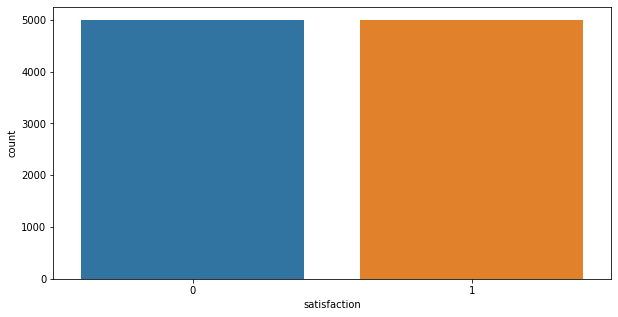

In [22]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='satisfaction')    # satisfaction count
plt.show()

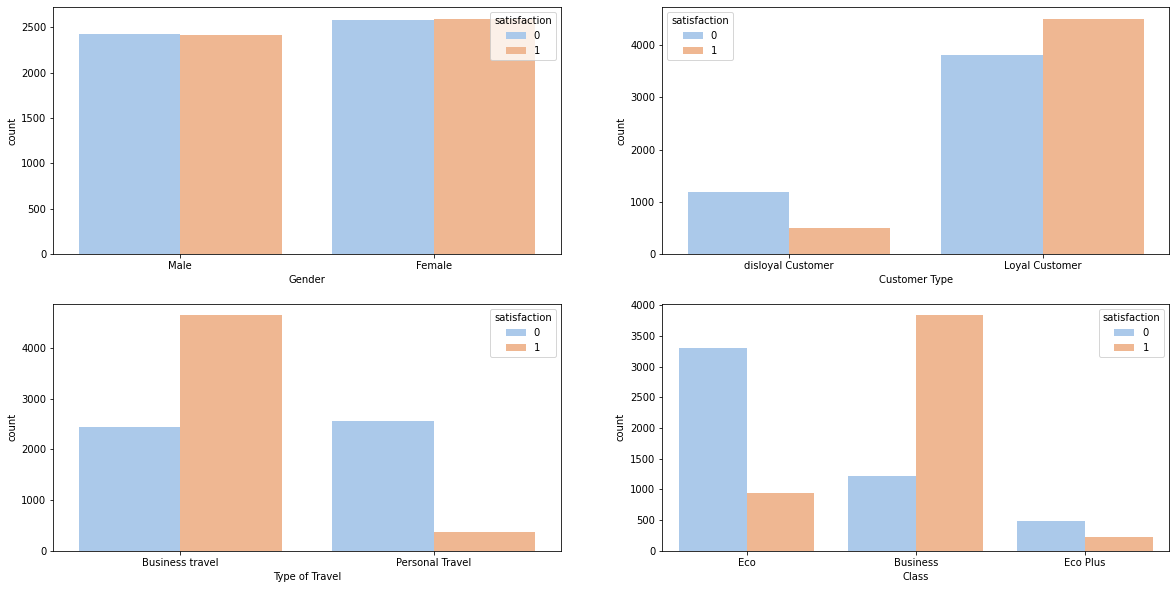

In [23]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

sel_col = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for i in range(2):
    for j in range(2):
        sns.countplot(x=sel_col[i*2+j], hue='satisfaction', palette='pastel', data=df, ax=axes[i,j])

plt.show()

# Processing

In [24]:
# encoding

labels = {'Male': 0, 'Female': 1,
          'Loyal Customer':1, 'disloyal Customer':0,
          'Business travel':1, 'Personal Travel':0,
          'Business':2, 'Eco Plus':1, 'Eco':0 }

df.replace(labels, inplace=True)

In [25]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [26]:
# split

X = df.drop("satisfaction", axis=1)
y = df['satisfaction']

In [27]:
# standardization

scaler = StandardScaler()
X_prepared = scaler.fit_transform(X)

# Model

In [28]:
xgb_model = XGBClassifier()
xgb_model.fit(X_prepared, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Test data

In [29]:
test = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv', index_col='id')
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   object 
 1   Customer Type                      4000 non-null   object 
 2   Age                                4000 non-null   int64  
 3   Type of Travel                     4000 non-null   object 
 4   Class                              4000 non-null   object 
 5   Flight Distance                    4000 non-null   int64  
 6   Inflight wifi service              4000 non-null   int64  
 7   Departure/Arrival time convenient  4000 non-null   int64  
 8   Ease of Online booking             4000 non-null   int64  
 9   Gate location                      4000 non-null   int64  
 10  Food and drink                     4000 non-null   int64  
 11  Online boarding                    4000 non-null   int64

In [31]:
# processing

test.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)
test.replace(labels, inplace=True)

In [32]:
# standardization

X_test_prepared = scaler.fit_transform(test)

In [33]:
# prediction

predicted = xgb_model.predict(X_test_prepared)

# Submission

In [34]:
solution = pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv', index_col='id')
solution.satisfaction = predicted
solution.to_csv("submission.csv")
pd.read_csv("./submission.csv")

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1
